<h1><center><strong>CX 4803<br><br>Homework 3</strong></center></h1>
<h3><center><i>Dylan Both</i></center></h3>

In [3]:
# imports
import csv
import numpy as np
import pandas as pd
from scipy import linalg
from scipy.stats import t
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.patches import Polygon
import plotly.graph_objects as go
import random as rand
import math

## Problem 1:

### 1(a):
We begin by creating an x and y list containing the values specified in the problem. Then we fit a linear regression to this data using OLS estimates.

In [2]:
x = np.array([0,-1,1])
y = np.array([1.1,-9.1, 11.0])
# add column of 1's to include an intercept
ones = np.ones(3)
x = np.c_[ones, x]
w = linalg.lstsq(x, y)[0]

In [3]:
# calculate the RSS
rss = np.sum(np.square(y-w.dot(x.T)))

The weights obtained using least squares are:
<ul>
    <li>$w_{0}=1$</li>
    <li>$w_{1}=10.05$
</ul>
The RSS for this regression is
\[RSS=0.015\]

### 1(b):
To obtain the ellipses relevent to this problem, we use the RSS since it is a quadratic in terms of our $w_0$ and $w_1$. We have
\begin{align}
\text{RSS}&=\sum_{i=1}^{n}(y_{i}-w_{0}-w_{1}x_{i})^2\\
&=\sum_{i=1}^{n}(y_{i}^2-2y_{i}w_{0}-2y_{i}x_{i}w_{1}+w_{0}^2+2x_{i}w_{0}w_{1}+x_{i}w_{1}^2)\\
&=\sum_{i=1}^{n}y_{i}^2-2w_{0}\sum_{i=1}^{n}y_{i}-2w_{1}\sum_{i=1}^{n}y_{i}x_{i}+nw_{0}^2+2w_{0}w_{1}\sum_{i=1}^{n}x_{i}+w_{1}^2\sum_{i=1}^{n}x_{i}^2
\end{align}

Using the $x_{i}$ and $y_{i}$ data given in the problem, 
\begin{align}
n&=3\\
2\sum_{i=1}^{n}x_{i}^2&=2\\
2\sum_{i=1}^{n}y_{i}&=6\\
2\sum_{i=1}^{n}y_{i}x_{i}&=40.2\\
\sum_{i=1}^{n}y_{i}^2&=205.02
\end{align}

Use the RSS from our regression and plug in these values and subtract$\sum_{i=1}^{n}y_{i}^2&=205.02$ from the LHS:
\begin{align}
-205.005&=3w_{0}^2+2w_{1}^2-6w_{0}-40.2w_{1}\\
-205.005&=3(w_{0}^2-2w_{0})+2(w_{1}^2-20.1w_{1})\\
-205.005&=3(w_{0}-1)^2-3+2(w_{1}-10.05)^2-202.005\\
0&=3(w_{0}-1)^2+2(w_{1}-10.05)^2\\
0&=\frac{3}{2}3(w_{0}-1)^2+(w_{1}-10.05)^2\\
0&=\frac{(w_{0}-1)^2}{2}+\frac{(w_{1}-10.05)^2}{2}\\
0&=\left(\frac{w_{0}-1}{\sqrt{2}}\right)^2+\left(\frac{w_{1}-10.05}{\sqrt{3}}\right)^2
\end{align}
Clearly this is satisfied if we plug in the values $w_{0}=1$ and $w_{1}=10.05$ that led to the RSS we used above. We know that different $w_{0}$ and $w_{1}$ weights will result in higher RSS since our leas squares solution found weights that led to the smallest possible RSS. Since the LHS of this equation is the RSS$-\sum_{i=1}^{n}y_{i}^2$, this equaiton shows that different $w_{0}$ and $w_{1}$ weights lead to scaled ellipses. Therefore, our $c_0, c_{1}, a_{0}$, and $a_{1}$ values are $1, 10.05, \sqrt{2}$, and $\sqrt{3}$ respectively.

### 1(c):
We begin by plotting the ellipses along with the 1-ball of radius $\eta=8$.

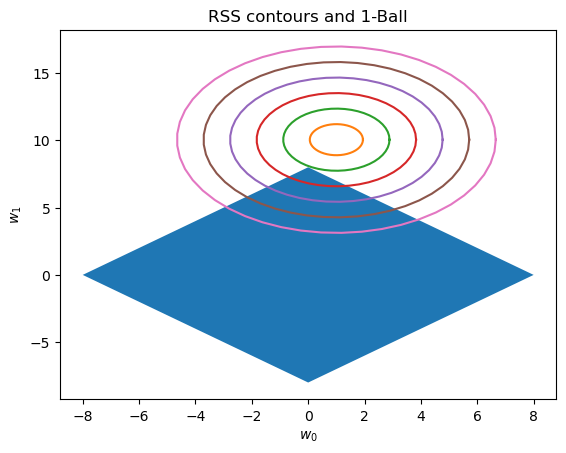

In [85]:
# define scaling factors to be used
deltas = np.linspace(0,4, 7)

# get ellipses (code adjusted from lasso sparcity demo)
xx = np.linspace(0, 2*math.pi, 50)
pointsx = np.cos(xx);
pointsy = np.sin(xx);
# plot ellipses for each delta value
for delta in deltas:
    plt.plot(math.sqrt(2)*delta*pointsx+1, math.sqrt(3)*delta*pointsy+10.05)
    
# plot 1-ball
pts = np.array([[0,8], [8,0], [0,-8], [-8,0]])
p = Polygon(pts, closed=False, fill='none')
ax = plt.gca()
ax.add_patch(p)
plt.title('RSS contours and 1-Ball')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.show()

Now we do the same but with the 2-ball. The reason the two ball appears like an ellipse is because the x and y axis are not on the same scale.

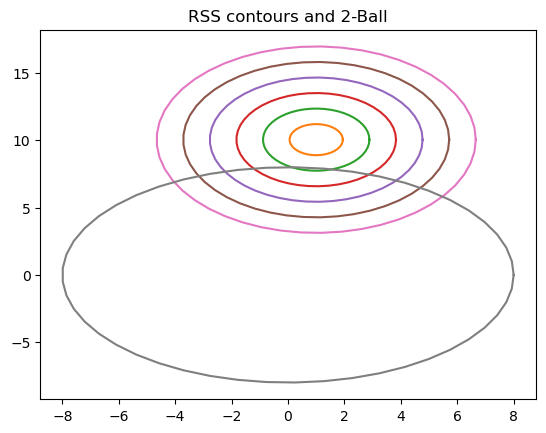

In [86]:
# get ellipses (code adjusted from lasso sparcity demo)
xx = np.linspace(0, 2*math.pi, 50)
pointsx = np.cos(xx);
pointsy = np.sin(xx);
# plot ellipses for each delta value
for delta in deltas:
    plt.plot(math.sqrt(2)*delta*pointsx+1, math.sqrt(3)*delta*pointsy+10.05)
    
# plot 2-ball    
x = 8 * np.cos(xx)
y = 8 * np.sin(xx)
plt.plot(x,y)

plt.title('RSS contours and 2-Ball')
plt.show()

### 1(d):
From the first graph, we can see that the ellipses first touch the 1-ball at the top corner. This corresponds to the weights $w_0=0$ and $w_{1}=8$.

Finding where the ellipses first meet the two ball is more challenging. From the second graph, we know that this occurs slightly to the right of the top of the one ball.

### 1(e):
As mentioned in part (d), the figure demonstrates that using a LASSO model would return the weights $w_0=0$ and $w_{1}=8$. Given these weights, the RSS is
\begin{align}
\text{RSS}&=\sum_{i=1}^{n}(y_{i}-0-8x_{i})^2\\
&=(1.1-8(0))+(-9.1-8(-1))+(11.0-8(1))\\
&=3.
\end{align}

### 1(f):
Finding the exact weights obtained using ridge regression is not possible by simply looking at our graph as it was for lasso. Therefore, we implement a ridge regression to find the weights.

In [81]:
x = np.array([0,-1,1])
y = np.array([1.1,-9.1, 11.0])
# add column of 1's to include an intercept
ones = np.ones(3)
x = np.c_[ones, x]
x2 = np.vstack([x, math.sqrt(0.5268)*np.eye(2)])
y2 = np.concatenate([y, np.zeros((2))])
w = linalg.lstsq(x2, y2)[0]
w

array([0.85062947, 7.95472534])

In [84]:
rss = np.mean(np.square(y-x.dot(w)))
rss

2.9540954783397892

The weights associated obtained using ridge regression are $w_{0}=0.85$ and $w_{1}=7.95$. The RSS obtained by these weights is $2.95$, which is slightly lower than the RSS obtained with the LASSO weights; however, it is much higher than that of the OLS weights.

### 2(g):
The ellipses demonstrate the possible weights that would lead to the same RSS value. Any combination of weights on a given ellipse leads to the same RSS value. The green ellipse that first touches the edge of the 1-ball represents the smallest possible RSS value such that the LASSO constraint is satisfied. However, this same green ellipse is not the same ellipse that first touches the edge of the two ball. My second figure shows that this green ellipse slighlty breaks through the edge of the 2-ball. Therefore, there is some $\delta$ smaller than the $\delta$ that leads to the green ellipse that would be tangent to the 2-ball. This $\delta$ would be associated with a smaller RSS value that still satisfies the constraint of the Ridge regression.

## Problem 2:

### 2(a):
We begin by generating 1000 samples of $(x,y)$ data where $y=sin(x)$ plus Gaussian noise with variance $\sigma^2=0.1$. We confine $x$ to the interval $[-1,1]$.

In [9]:
# generate noise
noise = np.random.normal(0,math.sqrt(0.1), 1000)
fun = lambda x : np.sin(2*math.pi*x)
# get x values
x = np.random.uniform(-1,1,1000)
# get y values
y = fun(x) + noise

### 2(b):
Using k-fold cross validation, we estimate the $(bias)^2$, variance, $(bias)^2$+variance, and test MSE for polynomial regressions of order $1,...,9$ using the data generated above.

Let $\hat{f}$ denote our polynomial regression function and $\epsilon$ denote our noise. The bias variance decomposition of MSE is as follows:
\begin{align}
MSE &= \mathbb{E}[(y-\hat{f})^2]\\
&= \mathbb{E}[y^2-2y\hat{f}+\hat{f}^2]\\
&=\mathbb{E}[y^2] -2\mathbb{E}[y\hat{f}]+\mathbb{E}[\hat{f}^2].
\end{align}
Since $Var[\hat{f}]=\mathbb{E}[\hat{f}^2]-\mathbb{E}[\hat{f}]^2$,
$\mathbb{E}[\hat{f}^2]=Var[\hat{f}]+\mathbb{E}[\hat{f}^2]$.
<br>Also,
\begin{align}
\mathbb{E}[y^2]&=\mathbb{E}[(f+\epsilon)^2]\\
&=\mathbb{E}[f^2]+2\mathbb{E}[f\epsilon]+\mathbb{E}[\epsilon^2]\\
&=f^2+2f\mathbb{E}[\epsilon]+\mathbb{E}[\epsilon^2]\\
&=f^2+\sigma^2 \text{ since our noise has mean 0.}
\end{align}
And, 
\begin{align}
\mathbb{E}[y\hat{f}]&=\mathbb{E}[(f+\epsilon)\hat{f}]\\
&=f\mathbb{E}[\hat{f}]+\mathbb{E}[\epsilon]\mathbb{E}[\hat{f}]\\
&=f\mathbb{E}[\hat{f}].
\end{align}
Therefore,
\begin{align}
\text{MSE}&=f^2+\sigma^2-2f\mathbb{E}[\hat{f}]+Var[\hat{f}]+\mathbb{E}[\hat{f}^2]\\
&=(f-\mathbb{E}[\hat{f}])^2+\sigma^2+Var[\hat{f}]\\
&=\text{Bias}[\hat{f}]^2+Var[\hat{f}]+\sigma^2.
\end{align}

Hence the (Bias)^2 that we calculate is $(y-\mathbb{E}[\hat{f}])^2$ and the variance is $\mathbb{E}[(\hat{f}-\mathbb{E}[\hat{f}])^2]$.

In [10]:
# define number of folds
k=500
# split the data into k parts
split_x = np.split(x, k)
split_y = np.split(y, k)

# initiate lists to store quantities for each polynomial order
mse_list = []
bias2_list = []
var_list = []
bias2_plus_var_list = []
# loop through each polynomial order
for i in range(1,10):
    # initiate list to store weights for each fold
    w_list = []
    # get X matrix for each polynomial
    X = np.ones(len(x))
    for m in range(1, i+1):
            X = np.c_[X, x**m]
    # loop through each fold
    for j in range(k):
        # get the j'th part of the data
        V_x = split_x[j]
        V_y = split_y[j]
        # get the remaining data
        T_x = np.concatenate([i for i in split_x if np.any(i != V_x)])
        T_y = np.concatenate([i for i in split_y if np.any(i != V_y)])
        # train polynomial regression of order m on T_x and T_y
        X_train = np.ones(len(T_x))
        X_test = np.ones(len(V_x))
        for m in range(1, i+1):
            # get X matrices for each polynomial
            X_train=np.c_[X_train, T_x**(m)]
            X_test=np.c_[X_test, V_x**(m)]
        # solve the least squares problem and add weights to list
        w = np.array(linalg.lstsq(X_train, T_y)[0])
        w_list.append(w)
    # get the expected weights
    mean_w = np.array(w_list).mean(axis=0)
    # get index
    ind = 0
    # initiate sums to calculate bias^2, variance, and mse
    bsum = 0
    mse_sum = 0
    var_sum = 0
    # loop through each observation
    for mat in X:
        # get the expected value of our polynomial regression
        f_hat = mat.dot(mean_w)
        # get the true function for the observation
        f = fun(mat[1])
        bsum += (f_hat-f)**2
        mse_sum += (y[ind] - f_hat)**2
        ind += 1
        lsum = 0
        for fold in w_list:
            lsum += (mat.dot(fold) - mat.dot(mean_w))**2
        var_sum += (lsum / k)
    # finish calulating metrics and add to appropriate lists
    bias2 = bsum / len(x)
    bias2_list.append(bias2)
    var = var_sum / len(x)
    var_list.append(var)
    bias2_plus_var = bias2 + var
    bias2_plus_var_list.append(bias2_plus_var)
    mse = mse_sum / len(x)
    mse_list.append(mse)     

### 2(c):
The plot below shows each of the metrics calculated above plotted as functions of m, the polynomial order.

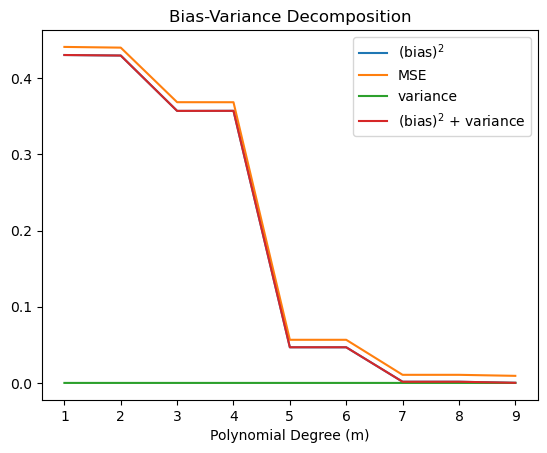

In [8]:
x_axis = range(1,10)
plt.plot(x_axis, bias2_list, label='(bias)$^2$')
plt.plot(x_axis, mse_list, label='MSE')
plt.plot(x_axis, var_list, label='variance')
plt.plot(x_axis, bias2_plus_var_list, label='(bias)$^2$ + variance')
plt.ticklabel_format(useOffset=False)
plt.legend()
plt.title('Bias-Variance Decomposition')
plt.xlabel('Polynomial Degree (m)')
plt.show()

### 2(d):
Our bias decreased with increasing m for m$=1$ to m$=3$, but surprising started to increase slightly in m after m$=4$. The reason that bias typically decreases with increasing m is that higher order polynomials have more flexibility than lower order polynomials, so they are better at fitting the observed data points. Variance is increasing in m. This is becasue, in order to use their flexibilty to fit observed data, higher order polynomials have wieghts that are larger in magnitude. Therefore, the variance for higher order polynomials is higher than it is for smaller order polynomials.

### 2(e):
Next, we repeat the k-fold cross validation process for seventh order polynomial ridge regressions for a specified range of penalty terms.
We solve the seventh order ridge regression like a traditional least squares polynomial regression with $\lambda I$ added to our $X$ matrix where $\lambda$ is our penalty term.

In [98]:
# specify lambdas
lambda_list = list(np.log(np.random.uniform(0.1, 0.5, 10)))

# initiate lists to store quantities for each polynomial order
ridge_mse_list = []
ridge_bias2_list = []
ridge_var_list = []
ridge_bias2_plus_var_list = []
# loop through each polynomial order
for log_lam in lambda_list:
    # initiate list to store weights for each fold
    w_list = []
    # get X matrix for each polynomial
    X = np.ones(len(x))
    for m in range(1, 8):
            X = np.c_[X, x**m]
    # loop through each fold
    for j in range(k):
        # get the j'th part of the data
        V_x = split_x[j]
        V_y = split_y[j]
        # get the remaining data
        T_x = np.concatenate([i for i in split_x if np.any(i != V_x)])
        T_y = np.concatenate([i for i in split_y if np.any(i != V_y)])
        # train polynomial regression of order m on T_x and T_y
        X_train = np.ones(len(T_x))
        X_test = np.ones(len(V_x))
        for m in range(1, 8):
            # get X matrices for each polynomial
            X_train=np.c_[X_train, T_x**(m)]
            X_test=np.c_[X_test, V_x**(m)]
        # add our penalty term
        base = math.e
        X_train = np.vstack([X_train, np.sqrt(math.exp(log_lam)) * np.eye(8)])
        # Construct the augmented target vector
        T_y = np.concatenate([T_y, np.zeros((8))])
        # solve the least squares problem and add weights to list
        w = np.array(linalg.lstsq(X_train, T_y)[0])
        w_list.append(w)
    # get the expected weights
    mean_w = np.array(w_list).mean(axis=0)
    # get index
    ind = 0
    # initiate sums to calculate bias^2, variance, and mse
    bsum = 0
    mse_sum = 0
    var_sum = 0
    # loop through each observation
    for mat in X:
        # get the expected value of our polynomial regression
        f_hat = mat.dot(mean_w)
        # get the true function for the observation
        f = fun(mat[1])
        bsum += (f_hat-f)**2
        mse_sum += (y[ind] - f_hat)**2
        ind += 1
        lsum = 0
        for fold in w_list:
            lsum += (mat.dot(fold) - mat.dot(mean_w))**2
        var_sum += (lsum / k)
    # finish calulating metrics and add to appropriate lists
    bias2 = bsum / len(x)
    ridge_bias2_list.append(bias2)
    var = var_sum / len(x)
    ridge_var_list.append(var)
    bias2_plus_var = bias2 + var
    ridge_bias2_plus_var_list.append(bias2_plus_var)
    mse = mse_sum / len(x)
    ridge_mse_list.append(mse)     

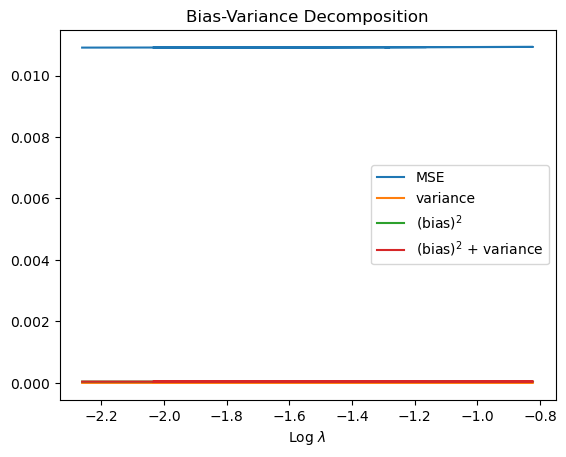

In [107]:
# define x axis
new_x_axis = lambda_list
plt.plot(new_x_axis, ridge_mse_list, label='MSE')
plt.plot(new_x_axis, ridge_var_list, label='variance')
plt.plot(new_x_axis, ridge_bias2_list, label='(bias)$^2$')
plt.plot(new_x_axis, ridge_bias2_plus_var_list, label='(bias)$^2$ + variance')
plt.ticklabel_format(useOffset=False)
plt.legend()
plt.title('Bias-Variance Decomposition')
plt.xlabel('Log $\lambda$')
plt.show()

As $\lambda$ increases, our variance decreases. This is hard to see in the visual since the values for variance are so small, but if you plot the variance alone as a function of log $\lambda$, you can clearly see the relationship. The reason variance decreases with increasing  $\lambda$ is that the penalty term prevents the weights from getting too large. Bias did not have any particular relationship with $\lambda$. Overall, bias increased in lambda, but the results were all over the place. Once again, it is necessary to plot bias vs log $\lambda$ seperately to see this relationship.

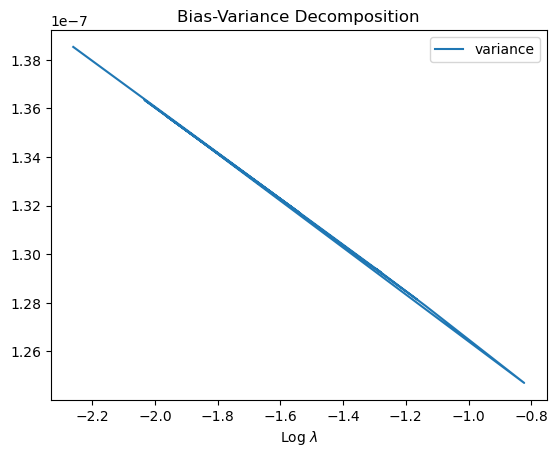

In [108]:
plt.plot(new_x_axis, ridge_var_list, label='variance')
plt.ticklabel_format(useOffset=False)
plt.legend()
plt.title('Bias-Variance Decomposition')
plt.xlabel('Log $\lambda$')
plt.show()

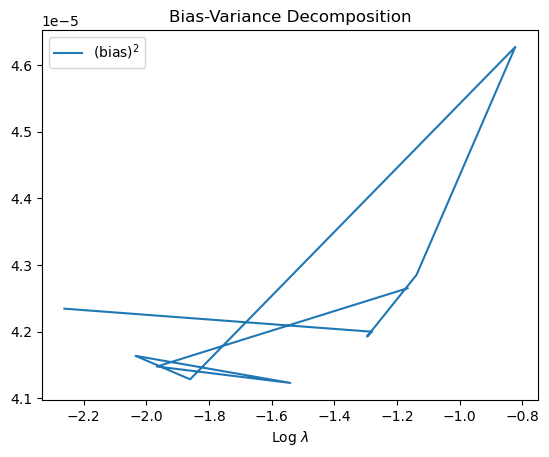

In [109]:
plt.plot(new_x_axis, ridge_bias2_list, label='(bias)$^2$')
plt.ticklabel_format(useOffset=False)
plt.legend()
plt.title('Bias-Variance Decomposition')
plt.xlabel('Log $\lambda$')
plt.show()

### 2(g):
To see the effect of regularization on a seventh degree polynomial, we compare the bias^2 and variance for the seventh order polynomial without regularization with our ridge regression results.


In [112]:
print(bias2_list[6] > np.mean(ridge_bias2_list))
print(var_list[6] > np.mean(ridge_var_list))

True
True


Interestingly, both our bias^2 and variance decreased when we added regularization. I suspect there is a bug in my code that is causing the bias^2 to be innacuratley calculated with regularization. When we add regularization, I would expect bias^2 to increase since variance decreases with regulariation and our RSS increases over the least squares solution. Therefore, our bias must be increasing.

## Problem 3

### 3(a):
Let $f(x)$ denote our polynomial regression of degree m. We have that
$$f(x)=\sum_{i=1}^{n}k(x,x_{i})y_{i}.$$
Then for any observation $(x_{i}, y_{i}),$
$$k(x,x_{i})=\frac{f(x)}{y_{i}}.$$
Therefore, to plot $k(x,x_{i})$ for several interesting observations $(x_{i}, y_{i})$, we obtain weights by training a polynomial regression on the $(x_{i}, y_{i})$ observation. Then we use these weights and our x value to obtain $f(x)$. Dividing this value by $y_{i}$ gives us our kernel function $k(x, x_{i}$ for that observation.

In [168]:
# create a function that return the kernel function 
def k(x, xi, yi, m):
    Xi = np.ones(1)
    for i in range(1, m+1):
        # get X matrix for each polynomial
        Xi=np.c_[Xi, xi**m]
    # solve the least squares problem
    w = np.array(linalg.lstsq(Xi, yi)[0])
    k_list = []
    for val in x:
        X = np.ones(1)
        for i in range(1, m+1):
            X=np.c_[X, val**m]
        f_x = X.dot(w)
        k_list.append(f_x / yi)
    return k_list

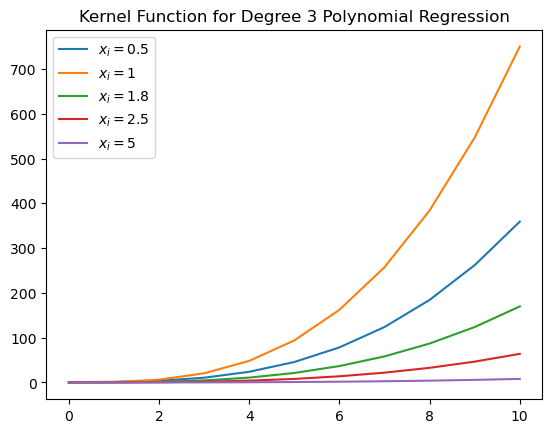

In [169]:
# define true function
fun = lambda x : 5+8*x+2*(x**2)+3*(x**3)
# create list of (xi,yi) observations
xi_list = [0.5,1,1.8,2.5,5]
obs = [(i, fun(i)+np.random.normal(0, math.sqrt(0.1),1)) for i in xi_list]

m=3
x = np.linspace(0, 10,11)
for ob in obs:
    plt.plot(x, k(x, ob[0], ob[1], m), label = f'$x_i=${ob[0]}')
plt.legend()
plt.title(f'Kernel Function for Degree {m} Polynomial Regression')
plt.show()

### 3(b):
This function is not the same for all $x_i$. For small values of x, the equivalent kernel function is the same/very similar for all values of $x_i$, but the larger x gets, the more the equivalent kernel function divirges for different values of $x_{i}$.

### 3(c):
Below I plot the equivalent kernel function for a number of different degree polynomials.

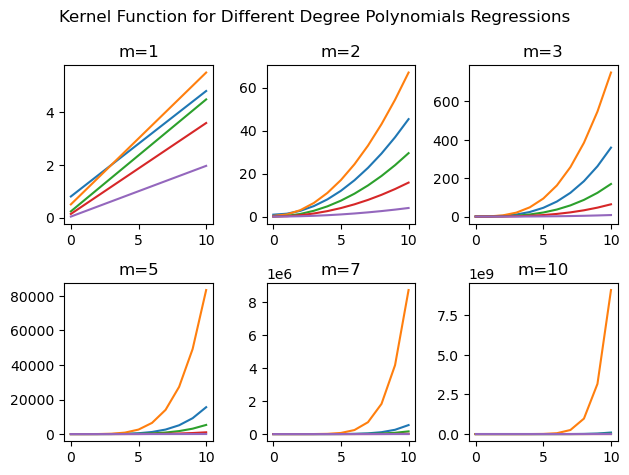

In [170]:
# pick m values to observe
m_list = [1,2,3,5,7, 10]

fig, ax = plt.subplots(2, 3)
for ob in obs:
    ax[0][0].plot(x, k(x, ob[0], ob[1], m_list[0]), label = f'$x_i=${ob[0]}')
    ax[0][0].set_title(f'm={m_list[0]}')
    
    ax[0][1].plot(x, k(x, ob[0], ob[1], m_list[1]), label = f'$x_i=${ob[0]}')
    ax[0][1].set_title(f'm={m_list[1]}')
    
    ax[0][2].plot(x, k(x, ob[0], ob[1], m_list[2]), label = f'$x_i=${ob[0]}')
    ax[0][2].set_title(f'm={m_list[2]}')
    
    ax[1][0].plot(x, k(x, ob[0], ob[1], m_list[3]), label = f'$x_i=${ob[0]}')
    ax[1][0].set_title(f'm={m_list[3]}')
    
    ax[1][1].plot(x, k(x, ob[0], ob[1], m_list[4]), label = f'$x_i=${ob[0]}')
    ax[1][1].set_title(f'm={m_list[4]}')
    
    ax[1][2].plot(x, k(x, ob[0], ob[1], m_list[5]), label = f'$x_i=${ob[0]}')
    ax[1][2].set_title(f'm={m_list[5]}')

plt.suptitle('Kernel Function for Different Degree Polynomials Regressions')
plt.tight_layout()
plt.show()

As demonstrated by the plots above, the equivalent kernel function increases very significanlty in magnitude for higher order polynomials. Additionally, the equivalent kernel function diverges even quicker as x increases the larger the value of m we choose.

### 3(d):
We repeat the above process for a polynomial ridge regression. We set m$=3$ and evaluate for various penalty terms.

In [176]:
# create a function that return the kernel function for polynomial ridge regression
def k_r(x, xi, yi, m, lam):
    Xi = np.ones(1)
    for i in range(1, m+1):
        # get X matrix for each polynomial
        Xi=np.c_[Xi, xi**m]
    Xi = np.vstack([Xi, math.sqrt(lam)*np.eye(m+1)])
    y = np.concatenate([yi, np.zeros(m+1)])
    # solve the least squares problem
    w = np.array(linalg.lstsq(Xi, y)[0])
    k_list = []
    for val in x:
        X = np.ones(1)
        for i in range(1, m+1):
            X=np.c_[X, val**m]
        f_x = X.dot(w)
        k_list.append(f_x / yi)
    return k_list


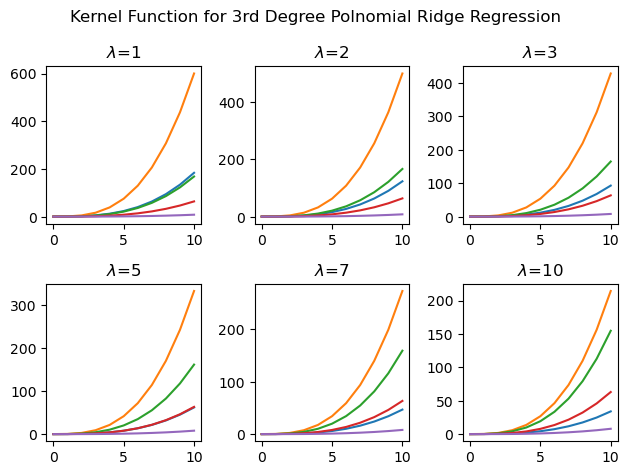

In [178]:
# pick lambda values to observe
lam_list = [1,2,3,5,7,10]

fig, ax = plt.subplots(2, 3)
for ob in obs:
    ax[0][0].plot(x, k_r(x, ob[0], ob[1], m, lam_list[0]), label = f'$x_i=${ob[0]}')
    ax[0][0].set_title(f'$\lambda$={lam_list[0]}')
    
    ax[0][1].plot(x, k_r(x, ob[0], ob[1], m, lam_list[1]), label = f'$x_i=${ob[0]}')
    ax[0][1].set_title(f'$\lambda$={lam_list[1]}')
    
    ax[0][2].plot(x, k_r(x, ob[0], ob[1], m, lam_list[2]), label = f'$x_i=${ob[0]}')
    ax[0][2].set_title(f'$\lambda$={lam_list[2]}')
    
    ax[1][0].plot(x, k_r(x, ob[0], ob[1], m, lam_list[3]), label = f'$x_i=${ob[0]}')
    ax[1][0].set_title(f'$\lambda$={m_list[3]}')
    
    ax[1][1].plot(x, k_r(x, ob[0], ob[1], m, lam_list[4]), label = f'$x_i=${ob[0]}')
    ax[1][1].set_title(f'$\lambda$={m_list[4]}')
    
    ax[1][2].plot(x, k_r(x, ob[0], ob[1], m, lam_list[5]), label = f'$x_i=${ob[0]}')
    ax[1][2].set_title(f'$\lambda$={m_list[5]}')

plt.suptitle('Kernel Function for 3rd Degree Polnomial Ridge Regression')
plt.tight_layout()
plt.show()

With $3$rd degree polynomial ridge regression, the equivalent kernel function gets smaller in magnitude as we increase the regularization parameter. This is opposite of the effect that increasing the degree of the polynomial has in regular polynomial regression. As was the case with polynomial regression, the equivalent kernel function for polynomial ridge regression is the same/similar across different $x_{i}$ values when x is small, but diverges for different $x_{i}$ values as x increases. However, unlike polynomial ridge regression, this divergence is acually slower as you increase the regualrization parameter.